In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
no2_long = pd.read_csv("air_quality_no2_long.csv")

In [4]:
no2_long = no2_long.rename(columns={"date.utc":"datetime"})

In [5]:
no2_long.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [10]:
no2_long.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [11]:
no2_long["city"].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [12]:
no2_long.datetime = pd.to_datetime(no2_long.datetime)

In [17]:
no2_long.dtypes

city                      object
country                   object
datetime     datetime64[ns, UTC]
location                  object
parameter                 object
value                    float64
unit                      object
dtype: object

In [19]:
da = no2_long.datetime.max()

In [20]:
xiao = no2_long.datetime.min()

In [21]:
xiao

Timestamp('2019-05-07 01:00:00+0000', tz='UTC')

In [22]:
da

Timestamp('2019-06-21 00:00:00+0000', tz='UTC')

In [23]:
da - xiao

Timedelta('44 days 23:00:00')

In [24]:
old_no2 = pd.read_csv("air_quality_no2_long.csv")

In [27]:
old_no2 = old_no2.rename(columns={ "date.utc": "datetime"}) 

In [28]:
old_no2.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [32]:
old_da = old_no2.datetime.max()

In [33]:
old_xiao = old_no2.datetime.min()

In [35]:
old_da

'2019-06-21 00:00:00+00:00'

In [36]:
old_xiao

'2019-05-07 01:00:00+00:00'

In [40]:
old_xiao == old_da

True

In [41]:
no2_long.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [62]:
no2_long["weekday"] = no2_long.datetime.dt.weekday

In [63]:
no2_long.head()

,city,country,datetime,location,parameter,value,unit,month,weekday
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6,4
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6,3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6,3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6,3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6,3


In [66]:
no2_long.groupby(
    [
        no2_long.datetime.dt.weekday,
        no2_long.location
    ]
)["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

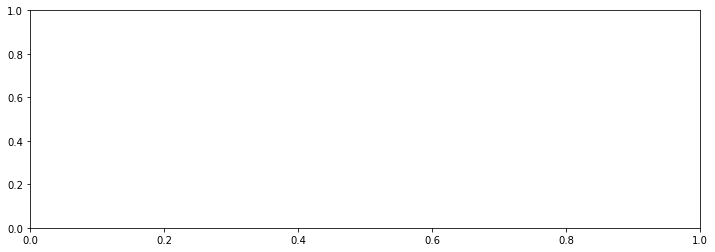

In [67]:
fig, axs = plt.subplots(figsize=(12, 4))

In [68]:
no2_long.groupby(
    no2_long.datetime.dt.hour
)["value"].mean().plot(
    kind="bar",
    rot=0,
    ax=axs
)

<AxesSubplot:xlabel='datetime'>

Text(0.5, 0, 'per hour in one day')

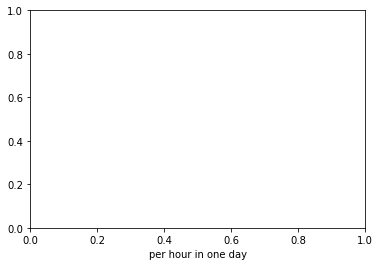

In [88]:
plt.xlabel("per hour in one day")

Text(0, 0.5, '$NO_2 (µg/m^3)$')

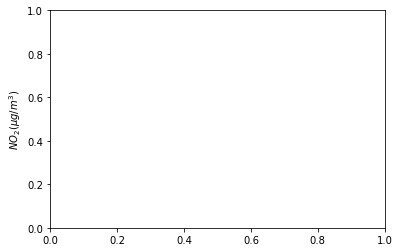

In [87]:
plt.ylabel("$NO_2 (µg/m^3)$")

In [74]:
plt

<module 'matplotlib.pyplot' from '/Users/junsircoding/miniconda3/envs/pandas_prac/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [89]:
fig.savefig("./hour.png")

In [90]:
no2_long

,city,country,datetime,location,parameter,value,unit,month,weekday
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6,4
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6,3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6,3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6,3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6,3
...,...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,5,1
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,5,1
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,5,1
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,5,1


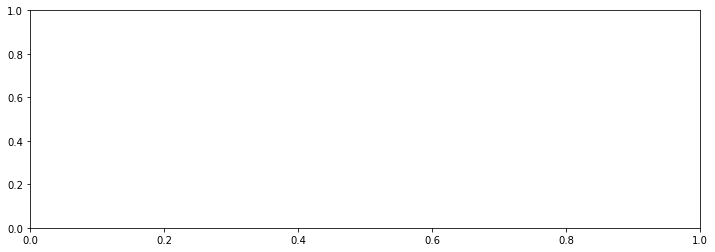

In [91]:
fig, axs = plt.subplots(figsize=(12, 4))

In [93]:
no2_long.groupby(no2_long.datetime.dt.hour)["value"].mean().plot(
    kind="bar", rot=0, ax=axs
)

<AxesSubplot:xlabel='datetime'>

In [97]:
axs.set_xlabel("per hour in a day")

Text(0.5, 17.200000000000003, 'per hour in a day')

In [98]:
axs.set_ylabel("$NO_2 (um/m^3)$")

Text(3.200000000000003, 0.5, '$NO_2 (um/m^3)$')

In [100]:
fig.savefig("hourdata.png")

In [101]:
no2 = no2_long.pivot(index="datetime", columns="location", values="value")

In [103]:
no2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


In [104]:
no2_long.head()

,city,country,datetime,location,parameter,value,unit,month,weekday
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6,4
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6,3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6,3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6,3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6,3


In [105]:
type(no2)

pandas.core.frame.DataFrame

In [107]:
no2.index.day

Int64Index([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
            ...
            20, 20, 20, 20, 20, 20, 20, 20, 20, 21],
           dtype='int64', name='datetime', length=1033)

<AxesSubplot:xlabel='datetime'>

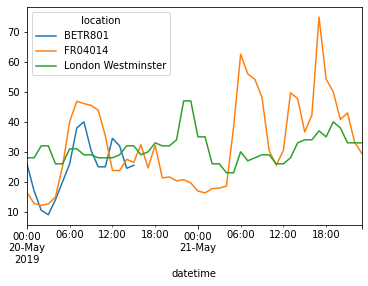

In [110]:
no2["2019/05/20":"2019/05/21"].plot()

In [119]:
no2_max = no2.resample("M").max()

In [122]:
no2_max.index.freq

<MonthEnd>

<AxesSubplot:xlabel='datetime'>

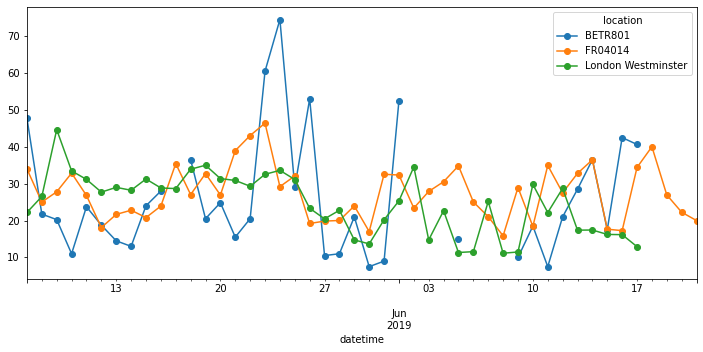

In [123]:
no2.resample("D").mean().plot(style="-o", figsize=(12, 5))